# Plotting correlation between columns
use this file to plot correlation between columns, taking the original imdb dataset as data since this one has the most movies in it.


In [1]:
# import neccessary stuff 
#run this from the datascience-films folder
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from pathlib import Path
import seaborn as sns 

# ignore some warnings, not pressing to fix these issues, more annoying to show these
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

RESOURCE_PATH = Path('../cleaned_data')
# import the data
df= pd.read_csv(RESOURCE_PATH / 'final_data_movies.csv',sep=',')

In [2]:
#extract historical_event, and target data, in this case the movie release year/years_after_event and the average rating
df['years_after_event'] = df.years_after_event.dropna()
#lastly pop our target we want
df['target'] = list(zip(df.years_after_event, df.averageRating))
target = df[['years_after_event','averageRating']]
target.averageRating =  target.averageRating.fillna(1)

In [3]:
numeric_feature_names = ['numVotes','averageRating']
numeric_features = df[numeric_feature_names]
numeric_features['numVotes'] = numeric_features['numVotes'].fillna(0)
numeric_features['numVotes'] = numeric_features['numVotes'].astype(np.int64)
numeric_features = numeric_features.dropna()

# Visualizing corrolation between the movie release year and the average rating/ number of votes

The first two plots show the correlation between the number of votes or the average rating vs. the movie release year.
remarkable is that there is really no correlation between the columns. 

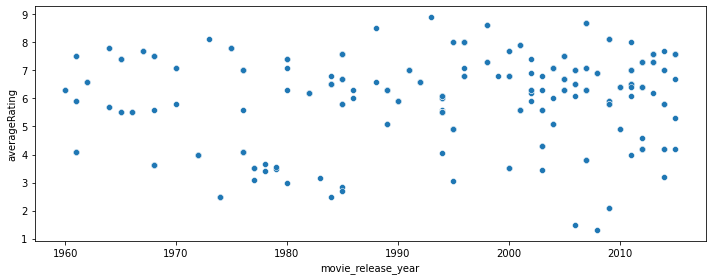

In [4]:
fig, ax = plt.subplots(figsize=(10,4))
sns.scatterplot(x=df['movie_release_year'],y= df['averageRating'], ax=ax)
plt.tight_layout()
plt.show()

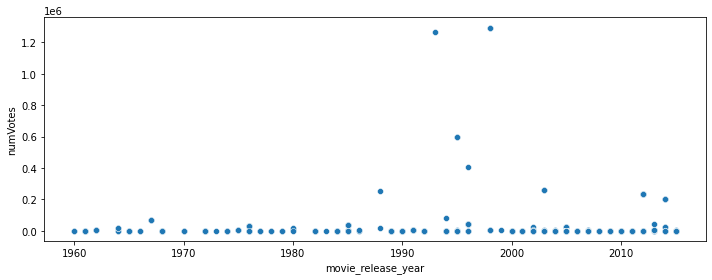

In [5]:
fig, ax = plt.subplots(figsize=(10,4))
sns.scatterplot(x=df['movie_release_year'],y= df['numVotes'], ax=ax)
plt.tight_layout()
plt.show()

# Visualizing corrolation between the time the movie got release after the event and the average rating/ number of votes

The first two plots show the correlation between the number of votes or the average rating vs. the movie release year.
There is a slight correlation between the average rating and the time the movie got released after the event, but nothing major in terms in linearity.

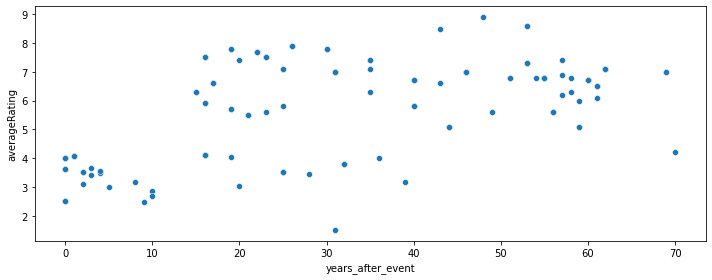

In [6]:
fig, ax = plt.subplots(figsize=(10,4))
sns.scatterplot(x=df['years_after_event'],y= df['averageRating'], ax=ax)
plt.tight_layout()
plt.show()



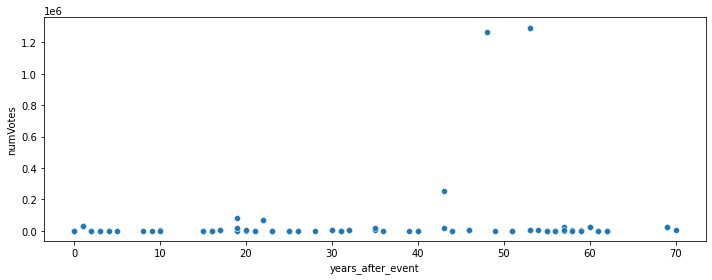

In [7]:
fig, ax = plt.subplots(figsize=(10,4))
sns.scatterplot(x=df['years_after_event'],y= df['numVotes'], ax=ax)
plt.tight_layout()
plt.show()